# WeRateDogs Twitter Data Wrangling Project

In today's project, we will be loading in data from the WeRateDogs tweet archive, which was provided to Udacity directly from the WeRateDogs account owners. 

WeRateDogs is a popular Twitter account that rates people's dogs with a unique scoring system that frequently goes above 10/10 in addition to providing a humorous comment. It is a very popular account on the social media platform, with over 8.8 million followers as of 10/10/2020.

We will firstly supplement this Udacity data with some additional key data points (# of Likes/Favorites and # of Retweets) using Tweepy - Twitter's Developer API. We are also adding in some datapoints which contain predictions for each of the dog's breeds extracted from a file that was created using a Udacity designed machine learning software.

We will then wrangle this data into a semi-clean presentation before going into a preliminary analysis and visualization of our data.

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import dill
import datetime
import matplotlib.pyplot as plt
% matplotlib inline
pd.set_option('display.max_colwidth', -1)

# Twitter API Process:
Note that for the code below to function, it is required to provide various keys and tokens to use the Twitter API. I do not provide the keys I personally used here in accordance with proper practice for private APIs.

If you are observing or evaluating this project for just the wrangling process, please skip to the "To Skip the Twitter API Process" section to load in the dataframe that will be used in the wrangling process

In [34]:
# The keys and token codes used during the project have been redacted in
# accordance with proper practice when using private APIs

import tweepy

consumer_key = 'cdcfmZ02qe83c7SzmcrF2BhPO'
consumer_secret = '7IlBSbpRJPuRjA0fc4JVS9FZBgM4QjAI97HVSLSxjNyCxLKYnu'
access_token = '254325276-6eGRWxXvReC5iBAzQpIAzd6LkZ2WjzYfZj9tj1Vi'
access_secret = 'F2Rd1H7NSuwVnySQ8BOB9LBUHVTjzrG1YHLBRMu4DdMFm'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [35]:
# Reading in the WeRateDogs Twitter Archive data
df = pd.read_csv('twitter-archive-enhanced.csv')

The following code is accessing a Udacity hosted file which contains predictions for each of the dog's breed based on an internally created machine learning software.

In [36]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [37]:
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [38]:
df2 = pd.read_csv('image_predictions.tsv',sep = '\t')

In [39]:
# Creating Columns to hold our Tweet Favorite and Retweet Counts
df['favorite_count'] = ""
df['retweet_count'] = ""

In [40]:
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)

In [41]:
data = {}
data['tweet_data'] = []

for tweet_id in range(len(df.tweet_id)):
    try:
        tweet = api.get_status(df.tweet_id[tweet_id],wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
        data['tweet_data'].append({
            'tweet_id': int(df.tweet_id[tweet_id]),
            'favorite_count': tweet.favorite_count,
            'retweet_count': tweet.retweet_count
        })
    except:
        continue

Rate limit reached. Sleeping for: 743
Rate limit reached. Sleeping for: 743


In [42]:
for tweet in range(len(data['tweet_data'])):
    df['favorite_count'][tweet] = data['tweet_data'][tweet]['favorite_count']
    df['retweet_count'][tweet] = data['tweet_data'][tweet]['retweet_count']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
with open('tweet_json.txt', 'w') as outfile:
    json.dump(data,outfile)

This code now merges our tweet dataframe with the image predictions dataframe to give our final dataframe upon which we will now assess and clean some of the underlying issues:

In [44]:
dogsdf = pd.merge(df,df2,on=['tweet_id'],how='left')

Now we save this combined data frame (still yet to be wrangled) into a new csv file which we can load in at anytime without having to go through the Tweepy process again.

In [45]:
dogsdf.to_csv('tweet_df.csv')

# To Skip the Twitter API Process:

In order to demonstrate the functionality of the code used in the data wrangling process, I will be loading in the dataframe that would have been created if the Twitter API process above was followed. This dataframe below is provided so that the rest of this project can be observed/evaluated without need for developer access to the Twitter API.

This code now merges our tweet dataframe with the image predictions dataframe to give our final dataframe upon which we will now assess and clean some of the underlying issues:

In [2]:
dogsdf = pd.read_csv('tweet_df.csv')

# Wrangling Process

In [3]:
dogsdf

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14

Quality Issues:
- Some of the observations/entries are retweets. We need to delete these because we only want original data and don't want to double count anything.
- Some of the entries are reply tweets from the WeRateDogs account on other Twitter accounts' tweets. We don't want to include these reply tweets in our analysis because they skew the data due to receiving far less exposure than the regular tweets that come directly from WeRateDogs themselves. The breed prediction model also doesn't work on these since the picture is not a direct part of the reply tweet.
- Some of the remaining entries after cleaning the first two quality issues are not actually dog ratings and are just tweets about unrelated matters like bands or hotdogs or the date.
- There are a few tweets that seem to have been deleted at some time between its original posting and this project's commencement (October 2020). This means that Tweepy was unable to gather tweet favorite/retweet data since the tweet no longer exists.
- There are a few tweets in which the image prediction algorithm was unable to produce a result.
- There are some scores which have a denominator that is not equal to 10. This should not be the case since WeRateDogs is rigorously consistent in using a x/10 rating system.
- Timestamp values do not need to have the "+0000" at the end. It should be in the "datetime" data type, not a string/object.
- Retweet and Favorite Count should be integer datatype, not a float.

Tidiness Issues:
- There are a lot of extra columns, some of which don't provide any data or variables (e.g. Retweet ID and Reply To ID) particularly after deleting the retweeted and reply tweet entries (part of our Quality Issues cleaning process)
- The stage of the dog's life should be one column instead of four.

# Creating a copy of our dataframe to work on

In [4]:
dogsdf_clean = dogsdf.copy()

## Quality Issue #1: - Some of the observations/entries are retweets. We need to delete these because we only want original data and don't want to double count anything.

Define:

We will be identifying all of the entries which have non NaN values in the "retweeted_status_id" column and then deleting them from our dataframe.

Code:

In [5]:
for entries in range(len(dogsdf_clean)):
    if(np.isnan(dogsdf_clean['retweeted_status_id'][entries])):
        continue
    else:
        dogsdf_clean.drop([entries],inplace=True)

dogsdf_clean.reset_index(drop = True, inplace=True)

Check:

In [6]:
dogsdf_clean[dogsdf_clean['retweeted_status_id'].notnull()]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Quality Issue #2: - Some of the entries are reply tweets from the WeRateDogs account on other Twitter accounts' tweets. We don't want to include these reply tweets in our analysis because they skew the data due to receiving far less exposure than the regular tweets that come directly from WeRateDogs themselves. The breed prediction model also doesn't work on these since the picture is not a direct part of the reply tweet.

Define:

Similar to Quality Issue #1, We will be identifying all of the entries which have non NaN values in the "in_reply_to_status_id" column and deleting them from our dataframe.

Code:

In [7]:
for entries in range(len(dogsdf_clean)):
    if(np.isnan(dogsdf_clean['in_reply_to_status_id'][entries])):
        continue
    else:
        dogsdf_clean.drop([entries],inplace=True)

dogsdf_clean.reset_index(drop = True, inplace=True)

Check:

In [8]:
dogsdf_clean[dogsdf_clean['in_reply_to_status_id'].notnull()]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [9]:
dogsdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 31 columns):
Unnamed: 0                    2097 non-null int64
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-nu

## Quality Issue #3: - Some of the remaining entries after cleaning the first two quality issues are not actually dog ratings and are just tweets about unrelated matters like bands or hotdogs or the date.

Define:

Identify which tweets do not have any data under the "expanded_urls" column. Because this column should contain links to the picture of a dog which is required in a standard WeRateDogs tweet, a "NaN" value in this column for a row indicates that the tweet is unrelated and not a regular WeRateDogs dog rating.

Code:

In [10]:
for entries in range(len(dogsdf_clean)):
    if(pd.isnull(dogsdf_clean['expanded_urls'][entries])):
        dogsdf_clean.drop([entries],inplace=True)
    else:
        continue

dogsdf_clean.reset_index(drop = True, inplace=True)

Check:

In [11]:
dogsdf_clean[dogsdf_clean['expanded_urls'].isnull()]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


# Quality Issue #4: There are a few tweets that seem to have been deleted at some time between its original posting and this project's commencement (October 2020). This means that Tweepy was unable to gather tweet favorite/retweet data since the tweet no longer exists.


Describe:

Identify which tweets that Tweepy was unable to pull Favorite/Retweet counts on and then delete these from our dataframe

Code:

In [12]:
for entries in range(len(dogsdf_clean)):
    if(pd.isnull(dogsdf_clean['favorite_count'][entries])):
        dogsdf_clean.drop([entries],inplace=True)
    else:
        continue
        
dogsdf_clean.reset_index(drop = True, inplace=True)

Check:

In [13]:
dogsdf_clean[dogsdf_clean['favorite_count'].isnull()]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


# Quality Issue #5: - There are a few tweets in which the image prediction algorithm was unable to produce a result. This is due to a multitude of possible reasons, examples of which include:

1.) The picture has been deleted due to copyright issues

2.) The tweet contains a video instead of a picture

3.) The tweet has been privatized or hidden (indicated by "This Tweet is unavailable")

4.) The tweet has pictures of multiple dogs instead of a single one

For whatever reason this may be the case - we would like to remove these entries from our dataframe.

Code:

In [14]:
for entries in range(len(dogsdf_clean)):
    if(pd.isnull(dogsdf_clean['p1'][entries])):
        dogsdf_clean.drop([entries],inplace=True)
    else:
        continue
        
dogsdf_clean.reset_index(drop = True, inplace=True)

Check:

In [15]:
dogsdf_clean[dogsdf_clean['p1'].isnull()]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


# Quality Issue #6: - There are some scores which have a denominator that is not equal to 10. This should not be the case since WeRateDogs is rigorously consistent in using a x/10 rating system. (Many of these appear to be because there are multiple dogs in the photo - we want to make sure each entry that we perform our data analysis/visualization on are all standardized to be one dog per rating and a rating out of 10).

Describe:

Identify the entries which have denominators that are not out of 10 and then delete them.

Code:

In [16]:
for entries in range(len(dogsdf_clean)):
    if dogsdf_clean['rating_denominator'][entries] != 10:
        dogsdf_clean.drop([entries],inplace=True)
    else:
        continue
        
dogsdf_clean.reset_index(drop = True, inplace=True)

Check:

In [17]:
dogsdf_clean[dogsdf_clean['rating_denominator'] != 10]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


# Quality Issue #7: - Timestamp values do not need to have the "+0000" at the end. It should be in the "datetime" data type, not a string/object.

Describe:

Parse the column values to delete the "+0000" and then use the datetime.strptime function to convert the values into datetime data type format.

Code:

In [18]:
# Code to remove "+0000" from variables
for entries in range(len(dogsdf_clean)):
    dogsdf_clean['timestamp'][entries] = dogsdf_clean['timestamp'][entries][:-6]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Code to convert object types to datetime
for entries in range(len(dogsdf_clean)):
    date_time_str = dogsdf_clean['timestamp'][entries]
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
    dogsdf_clean['timestamp'][entries] = date_time_obj

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Check:

In [20]:
# Check that the "+0000" has been removed
dogsdf_clean['timestamp']

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
5       2017-07-29 00:08:17
6       2017-07-28 16:27:12
7       2017-07-28 00:22:40
8       2017-07-27 16:25:51
9       2017-07-26 15:59:51
10      2017-07-26 00:31:25
11      2017-07-25 16:11:53
12      2017-07-25 01:55:32
13      2017-07-25 00:10:02
14      2017-07-24 17:02:04
15      2017-07-24 00:19:32
16      2017-07-23 00:22:39
17      2017-07-22 16:56:37
18      2017-07-22 00:23:06
19      2017-07-20 16:49:33
20      2017-07-19 16:06:48
21      2017-07-19 03:39:09
22      2017-07-19 00:47:34
23      2017-07-18 16:08:03
24      2017-07-18 00:07:08
25      2017-07-17 16:17:36
26      2017-07-16 23:58:41
27      2017-07-16 20:14:00
28      2017-07-15 23:25:31
29      2017-07-15 16:17:19
               ...         
1900    2015-11-18 18:17:59
1901    2015-11-18 16:12:51
1902    2015-11-18 15:07:24
1903    2015-11-18 14:18:59
1904    2015-11-18 0

In [21]:
# Check that the variables are in datetime class
for entries in range(len(dogsdf_clean)):
    if isinstance(dogsdf_clean['timestamp'][entries], datetime.date):
        continue
    else:
        print ("Failed")

# Quality Issue #8: Retweet and Favorite Count should be integer datatype, not a float.

In [22]:
dogsdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 31 columns):
Unnamed: 0                    1930 non-null int64
tweet_id                      1930 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1930 non-null object
source                        1930 non-null object
text                          1930 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1930 non-null object
rating_numerator              1930 non-null int64
rating_denominator            1930 non-null int64
name                          1930 non-null object
doggo                         1930 non-null object
floofer                       1930 non-null object
pupper                        1930 non-null object
puppo                         1930 non-nu

Describe:

Convert Retweet and Favorite Count columns into integer datatypes.

Code:

In [23]:
dogsdf_clean['favorite_count'] = dogsdf_clean['favorite_count'].astype('int')
dogsdf_clean['retweet_count'] = dogsdf_clean['retweet_count'].astype('int')

Check:

In [24]:
dogsdf_clean['favorite_count'].dtype

dtype('int64')

In [25]:
dogsdf_clean['retweet_count'].dtype

dtype('int64')

# Quality Issue #9: There are a few entries which have incorrect names for the dogs. This is either because there isn't a provided name in the tweet (which usually results in the name saying "an" or "a"), or the name was faultily extracted during the data gathering process.

Describe:

Although it would be a difficult and complicated process to check every single entry to verify that the extracted names are correct, we can accomplish a good amount of cleaning on the names that are obviously incorrect by filtering out the ones that are 2 letters or less because these are usually incorrect entries that say "an" or "a" (there are a few exceptions to this e.g. some of the dogs are named "Bo" and we will leave them alone).

Code:

In [26]:
dogsdf_clean[dogsdf_clean['name'].map(len) < 3]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
49,56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,...,1.0,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,1.148540e-01,False
292,393,825876512159186944,NaN,NaN,2017-01-30 01:21:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mo. No one will push him around in the grocery cart. He's quite pupset about it. 11/10 I volunteer https://t.co/feNwTq12S5,NaN,NaN,NaN,...,1.0,shopping_cart,0.995941,False,shopping_basket,0.004057,False,mousetrap,8.832830e-07,False
329,449,819004803107983360,NaN,NaN,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,NaN,NaN,NaN,...,1.0,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,9.475920e-02,True
406,553,804026241225523202,NaN,NaN,2016-11-30 18:16:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq,NaN,NaN,NaN,...,1.0,web_site,0.492709,False,envelope,0.050566,False,guillotine,1.529690e-02,False
466,649,792913359805018113,NaN,NaN,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,...,4.0,web_site,0.226716,False,lighter,0.081941,False,switch,3.900860e-02,False
485,679,789137962068021249,NaN,NaN,2016-10-20 16:15:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He's a West Congolese Bugaboop Snuggle. Rather exotic. Master of the head tilt. 12/10 would pay to pet https://t.co/2jwxxtNzoN,NaN,NaN,NaN,...,2.0,Chihuahua,0.746135,True,Pekinese,0.070383,True,Pembroke,4.923690e-02,True
555,775,776201521193218049,NaN,NaN,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,...,1.0,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,1.351760e-01,True
576,801,772581559778025472,NaN,NaN,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,...,3.0,Newfoundland,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,5.947550e-02,True
591,820,770414278348247044,NaN,NaN,2016-08-30 00:14:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV,NaN,NaN,NaN,...,1.0,maillot,0.580528,False,maillot,0.081449,False,golden_retriever,5.356960e-02,True
616,852,765395769549590528,NaN,NaN,2016-08-16 03:52:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,...,1.0,Pembroke,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,3.887490e-02,True


In [27]:
# From visually inspecting this subset, we can see that one of the incorrect
# names here is "O" when in fact the dog's full name is actually "O'Malley"

dogsdf_clean['name'][550] = "O'Malley"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


For the entries which have names that say "an" or "a" - Some of these are because there are no names provided at all in the tweet. We can't do much to fix these, so we'll focus instead on those entries which DO have a name, but our data extraction process falsely selected "an" or "a" from the tweet as the name. Most of these tend to start with "This is a... named...".

In [28]:
dogsdf_clean[dogsdf_clean['text'].str.contains("This is a" and "name",regex=False)]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
133,168,859607811541651456,NaN,NaN,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,NaN,NaN,NaN,...,1.0,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,1.928540e-02,True
276,373,828376505180889089,NaN,NaN,2017-02-05 22:55:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Beebop. Her name means ""Good Dog"" in robot. She also was a star on the field today. 13/10 would pet well https://t.co/HKBVZqXFNR",NaN,NaN,NaN,...,1.0,American_Staffordshire_terrier,0.523086,True,Staffordshire_bullterrier,0.186168,True,Chihuahua,4.208940e-02,True
616,852,765395769549590528,NaN,NaN,2016-08-16 03:52:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,...,1.0,Pembroke,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,3.887490e-02,True
714,974,750056684286914561,NaN,NaN,2016-07-04 20:00:23,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Jameson. He had a few too many in the name of freedom. I can't not respect that. 11/10 'Merica https://t.co/8zQvXM6pG5,NaN,NaN,NaN,...,1.0,Saluki,0.484428,True,borzoi,0.263550,True,Labrador_retriever,7.700380e-02,True
852,1136,728387165835677696,NaN,NaN,2016-05-06 00:53:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Enchilada (yes, that's her real name). She's a Low-Cruisin Plopflopple. Very rare. Only a few left. 12/10 https://t.co/SiaiTWgsfP",NaN,NaN,NaN,...,1.0,collie,0.266414,True,Great_Pyrenees,0.138546,True,keeshond,1.090140e-01,True
1313,1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN,NaN,NaN,...,1.0,teddy,0.364095,False,doormat,0.119243,False,toyshop,3.512710e-02,False
1352,1719,680161097740095489,NaN,NaN,2015-12-24 23:00:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Goliath. He's an example of irony. Head is phenomenally round. Wants to be an ornament. 12/10 would hug gently https://t.co/72Dil0Aktw,NaN,NaN,NaN,...,1.0,bluetick,0.268681,True,miniature_pinscher,0.125652,True,English_setter,8.937270e-02,True
1358,1725,680070545539371008,NaN,NaN,2015-12-24 17:00:27,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",Say hello to Emmie. She's trapped in an ornament. Tragic af. Looks pretty content tho. Maybe it's meant to be. 9/10 https://t.co/Fh7geodBCU,NaN,NaN,NaN,...,1.0,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,1.178200e-01,False
1366,1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN,NaN,NaN,...,1.0,French_bulldog,0.319139,True,Chihuahua,0.154088,True,Cardigan,1.176880e-01,True
1379,1748,679062614270468097,NaN,NaN,2015-12-21 22:15:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chompsky. He lives up to his name. 11/10 https://t.co/Xl37lQEWd0,NaN,NaN,NaN,...,2.0,cash_machine,0.802333,False,schipp

In [29]:
dogsdf_clean['name'][132] = "Zoey"
dogsdf_clean['name'][611]='Zoey'
dogsdf_clean['name'][1307]='Thea'
dogsdf_clean['name'][1359]='Sabertooth'
dogsdf_clean['name'][1463] = "Wylie"
dogsdf_clean['name'][1556]="Kip"
dogsdf_clean['name'][1635]='Jacob'
dogsdf_clean['name'][1665]='Rufus'
dogsdf_clean['name'][1715]='Spork'
dogsdf_clean['name'][1724]='Cherokee'
dogsdf_clean['name'][1727]='Hemry'
dogsdf_clean['name'][1745]='Alphred'
dogsdf_clean['name'][1759]='Alfredo'
dogsdf_clean['name'][1764]='Zeus'
dogsdf_clean['name'][1787]='Leroi'
dogsdf_clean['name'][1800]='Berta'
dogsdf_clean['name'][1813]='Chuk'
dogsdf_clean['name'][1822]='Guss'
dogsdf_clean['name'][1830]='Alfonso'
dogsdf_clean['name'][1844]='Cheryl'
dogsdf_clean['name'][1850]='Jessiga'
dogsdf_clean['name'][1857]='Klint'
dogsdf_clean['name'][1860]='Big Jumpy Rat'
dogsdf_clean['name'][1862]='Tickles'
dogsdf_clean['name'][1866]='Kohl'
dogsdf_clean['name'][1880]='Daryl'
dogsdf_clean['name'][1896]='Pepe'
dogsdf_clean['name'][1903]='Octaviath'
dogsdf_clean['name'][1905]='Lugan'
dogsdf_clean['name'][1906]='Johm'
dogsdf_clean['name'][1910]='Kreggory'

dogsdf_clean.drop([1898],inplace=True) #This entry is actually two dogs, not one.
dogsdf_clean.reset_index(drop = True, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-p

In [30]:
dogsdf_clean['name'].replace(['a','an','the'],'None',inplace=True)

Check:

In [31]:
dogsdf_clean[(dogsdf_clean['name'] == 'a')|(dogsdf_clean['name'] == 'an')]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Tidiness Issue #1: There are a lot of extra columns, some of which don't provide any data or variables (e.g. Retweet ID and Reply To ID) particularly after deleting the retweeted and reply tweet entries (part of our Quality Issues cleaning process).

This is also a good opportunity to remove any columns that we know we will not be using during our analysis/visualization.

Describe:

Remove the columns which don't contain any variables as well as the "extra" columns

Code:

In [32]:
dogsdf_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                            'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls',
                            'jpg_url','img_num','source'],inplace=True)

Check:

In [33]:
dogsdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 22 columns):
Unnamed: 0            1929 non-null int64
tweet_id              1929 non-null int64
timestamp             1929 non-null object
text                  1929 non-null object
rating_numerator      1929 non-null int64
rating_denominator    1929 non-null int64
name                  1929 non-null object
doggo                 1929 non-null object
floofer               1929 non-null object
pupper                1929 non-null object
puppo                 1929 non-null object
favorite_count        1929 non-null int64
retweet_count         1929 non-null int64
p1                    1929 non-null object
p1_conf               1929 non-null float64
p1_dog                1929 non-null object
p2                    1929 non-null object
p2_conf               1929 non-null float64
p2_dog                1929 non-null object
p3                    1929 non-null object
p3_conf               1929 non-null f

## Tidiness Issue #2: The score should be one column instead of two (i.e. "Score" instead of "Rating Numerator" and "Rating Denominator"). The stage of the dog's life should be one column instead of four.


Define:

Delete the rating_denominator column and rename the rating_numerator column into "score"

Code:

In [34]:
dogsdf_clean.drop(columns=['rating_denominator'],inplace=True)
dogsdf_clean.rename(columns={'rating_numerator':'score'},inplace=True)

Check:

In [35]:
dogsdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 21 columns):
Unnamed: 0        1929 non-null int64
tweet_id          1929 non-null int64
timestamp         1929 non-null object
text              1929 non-null object
score             1929 non-null int64
name              1929 non-null object
doggo             1929 non-null object
floofer           1929 non-null object
pupper            1929 non-null object
puppo             1929 non-null object
favorite_count    1929 non-null int64
retweet_count     1929 non-null int64
p1                1929 non-null object
p1_conf           1929 non-null float64
p1_dog            1929 non-null object
p2                1929 non-null object
p2_conf           1929 non-null float64
p2_dog            1929 non-null object
p3                1929 non-null object
p3_conf           1929 non-null float64
p3_dog            1929 non-null object
dtypes: float64(3), int64(5), object(13)
memory usage: 316.6+ KB


Define:

Before we can consolidate the dog life stages into one column, we actually need to address the issue of how many of these entries don't actually have a classification into any of the four defined categories. We will mark each of these dogs with the tag "Other" so that they do not get looked over/deleted during the rest of our cleaning process.


Code:

In [36]:
dogsdf_clean['other'] = ''
for entries in range(len(dogsdf_clean)):
    if dogsdf_clean['doggo'][entries] == 'doggo':
        dogsdf_clean['other'][entries] = 'None'
    elif dogsdf_clean['floofer'][entries] == 'floofer':
        dogsdf_clean['other'][entries] = 'None'
    elif dogsdf_clean['pupper'][entries] == 'pupper':
        dogsdf_clean['other'][entries] = 'None'
    elif dogsdf_clean['puppo'][entries] == 'puppo':
        dogsdf_clean['other'][entries] = 'None'
    else:
        dogsdf_clean['other'][entries] = 'other'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykern

Now we will use Panda's Melt function in order to consolidate the dog life stages into one column representing one variable. Concerning the rating columns, we can simply delete the "rating denominator" column since we've already made sure that every entry's score in our dataframe is standardized to be out of 10.

In [37]:
dogsdfb = dogsdf_clean

Code:

In [38]:
dogsdf_clean = pd.melt(dogsdf_clean, id_vars = ['tweet_id','timestamp',
                                               'text','name','favorite_count',
                                               'retweet_count','score','p1','p1_conf',
                                               'p1_dog','p2','p2_conf','p2_dog',
                                               'p3','p3_conf','p3_dog'],
                       value_vars = ['doggo','floofer','pupper','puppo','other'],
                       var_name = ['stage']
                      )

In [39]:
# This code deletes our duplicate entries and the extra "value" column
for entries in range(len(dogsdf_clean)):
    if dogsdf_clean['value'][entries] == 'None':
        dogsdf_clean.drop([entries],inplace=True)
dogsdf_clean.drop_duplicates(subset=['tweet_id'],inplace=True)
dogsdf_clean.drop(columns=['value'],inplace=True)
dogsdf_clean.reset_index(drop = True, inplace = True)

Check:

In [40]:
dogsdf_clean

,tweet_id,timestamp,text,name,favorite_count,retweet_count,score,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,29332,6510,14,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo
1,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,Yogi,20093,3034,12,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,doggo
2,872967104147763200,2017-06-09 00:02:31,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,None,19206,3273,12,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,doggo
3,871515927908634625,2017-06-04 23:56:03,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,Napolean,31282,5594,12,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False,doggo
4,869596645499047938,2017-05-30 16:49:31,This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,Scout,9390,1877,12,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,doggo
5,858843525470990336,2017-05-01 00:40:27,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,None,214,17,13,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True,doggo
6,855851453814013952,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,None,30616,7041,13,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,doggo
7,854010172552949760,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",None,31882,9460,11,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,doggo
8,846514051647705089,2017-03-28 00:07:32,This is Barney. He's an elder doggo. Hitches a ride when he gets tired. Waves goodbye before he leaves. 13/10 please come back soon https://t.co/cFAasDXauK,Barney,0,7398,13,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True,doggo
9,845397057150107648,2017-03-24 22:08:59,"Say hello to Mimosa. She's an emotional support doggo who helps her owner with PTSD. 13/10, but she needs your help\n\nhttps://t.co/L6mLzrd7Mx https://t.co/jMutBFdw5o",Mimosa,20992,5814,13,Dandie_Dinmont,0.394404,True,Maltese_dog,0.186537,True,West_Highland_white_terrier,0.181985,True,doggo


# Saving our cleaned data into a new CSV file

In [41]:
dogsdf_clean.to_csv('twitter_archive_master.csv',index=False)

# Insights and Visualization

In [2]:
df = pd.read_csv('twitter_archive_master.csv')

In [3]:
df['score'].describe()

count    1929.000000
mean     11.750130  
std      41.341656  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: score, dtype: float64

In [4]:
df.sort_values(by=['score'],ascending=False).head(5)

,tweet_id,timestamp,text,name,favorite_count,retweet_count,score,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
896,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,Atticus,2765,731,1776,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,other
1680,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,None,1116,446,420,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,other
714,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",Logan,20001,7995,75,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,other
110,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,Sophie,7333,2928,27,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,pupper
1401,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,None,4636,2015,26,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,other


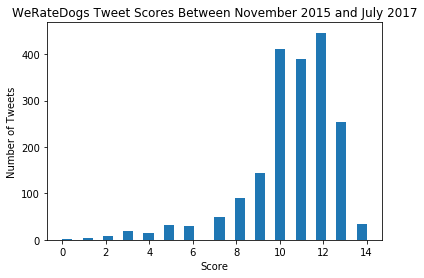

In [5]:
plt.hist(df['score'], bins=30, range=(0,14));
plt.xlabel('Score')
plt.ylabel('Number of Tweets')
plt.title('WeRateDogs Tweet Scores Between November 2015 and July 2017');

The most commonly awarded score (the "mode") of the dataset is a 12/10, which is above the mean of 11.75. This dataset is skewed left, which indicates that it is more common for outliers that deviate from the typical 10 - 14 range to be scored below the average than above it. In fact, whereas there are a good number of dogs who scored below a 10/10, there are only 5 dogs in the entire archive who were scored higher than a 14 (all of which are therefore not captured in the histogram visualization above).

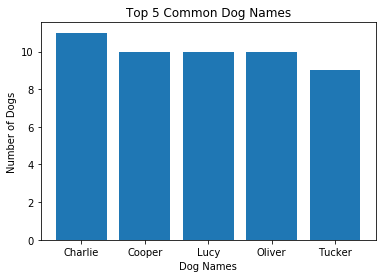

In [6]:
plt.bar(x=['Cooper','Charlie', 'Oliver', 'Lucy', 'Tucker'], height=[10,11,10,10,9]);
plt.xlabel('Dog Names')
plt.ylabel('Number of Dogs')
plt.title('Top 5 Common Dog Names');

The most common dog name in this archive is Charlie, closely followed by a 3 way tie for second between Cooper, Oliver, and Lucy.

In [7]:
df.sort_values(by=['favorite_count'],ascending=False).head(5)

,tweet_id,timestamp,text,name,favorite_count,retweet_count,score,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
920,747103485104099331,2016-06-26 16:25:26,"Guys... I said DOGS with ""shark qualities"" or ""costumes."" Not actual sharks. This did me a real frighten ...11/10 https://t.co/DX1JUHJVN7",None,152944,75701,11,Labrador_retriever,0.991954,True,golden_retriever,0.002228,True,doormat,0.001404,False,other
616,810896069567610880,2016-12-19 17:14:23,"This is Hunter. He just found out he needs braces. Requesting an orthodogtist stat. 11/10 you're fine Hunter, everything's fine https://t.co/zW1o0W4AYV",Hunter,118100,55178,11,flat-coated_retriever,0.820804,True,Labrador_retriever,0.082318,True,curly-coated_retriever,0.067461,True,other
285,867421006826221569,2017-05-24 16:44:18,This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go,Shikha,114238,32163,12,Eskimo_dog,0.616457,True,Siberian_husky,0.381330,True,malamute,0.001670,True,puppo
945,742385895052087300,2016-06-13 15:59:24,This is Phil. That's his comfort stick. He holds onto it whenever he's sad. 11/10 don't be sad Phil https://t.co/ULdPY6CLpq,Phil,113075,56328,11,Cardigan,0.566911,True,Border_collie,0.117566,True,Appenzeller,0.047664,True,other
352,879492040517615616,2017-06-27 00:10:17,This is Bailey. He thinks you should measure ear length for signs of growth instead. 12/10 https://t.co/IxM9IMKQq8,Bailey,97422,39704,12,German_short-haired_pointer,0.479896,True,vizsla,0.124353,True,bath_towel,0.073320,False,other


In [8]:
df.sort_values(by=['retweet_count'],ascending=False).head(5)

,tweet_id,timestamp,text,name,favorite_count,retweet_count,score,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
920,747103485104099331,2016-06-26 16:25:26,"Guys... I said DOGS with ""shark qualities"" or ""costumes."" Not actual sharks. This did me a real frighten ...11/10 https://t.co/DX1JUHJVN7",None,152944,75701,11,Labrador_retriever,0.991954,True,golden_retriever,0.002228,True,doormat,0.001404,False,other
945,742385895052087300,2016-06-13 15:59:24,This is Phil. That's his comfort stick. He holds onto it whenever he's sad. 11/10 don't be sad Phil https://t.co/ULdPY6CLpq,Phil,113075,56328,11,Cardigan,0.566911,True,Border_collie,0.117566,True,Appenzeller,0.047664,True,other
616,810896069567610880,2016-12-19 17:14:23,"This is Hunter. He just found out he needs braces. Requesting an orthodogtist stat. 11/10 you're fine Hunter, everything's fine https://t.co/zW1o0W4AYV",Hunter,118100,55178,11,flat-coated_retriever,0.820804,True,Labrador_retriever,0.082318,True,curly-coated_retriever,0.067461,True,other
352,879492040517615616,2017-06-27 00:10:17,This is Bailey. He thinks you should measure ear length for signs of growth instead. 12/10 https://t.co/IxM9IMKQq8,Bailey,97422,39704,12,German_short-haired_pointer,0.479896,True,vizsla,0.124353,True,bath_towel,0.073320,False,other
565,821044531881721856,2017-01-16 17:20:45,This is Flash. He went way too hard celebrating Martin Luther King Day last night. 12/10 now he's having a dream in his honor https://t.co/bryVdNaRcu,Flash,0,36568,12,Old_English_sheepdog,0.148020,True,Airedale,0.133534,True,Tibetan_mastiff,0.120903,True,other


The dog with the highest amount of favorites AND retweets in the dataset is an unnamed labrador who dressed up as a shark. 4 dogs are in both of the Top 5 for the Most Favorited and also the Most Retweeted lists, suggesting that those dogs who tend to receive a lot of favorites on the twitter page also receive a lot of retweets.